In [51]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/gtd/globalterrorismdb_0718dist.csv


In [33]:
df = pd.read_csv("../input/gtd/globalterrorismdb_0718dist.csv", encoding="ISO-8859-1",low_memory = False)

In [55]:
df_new = df.groupby('iyear').success.value_counts().unstack()
success_array = []
for i in df_new.values:
    success_array.append(i[0])
success_array

[102,
 51,
 116,
 40,
 36,
 35,
 62,
 128,
 115,
 254,
 275,
 232,
 171,
 210,
 213,
 188,
 190,
 250,
 281,
 316,
 304,
 384,
 511,
 387,
 287,
 288,
 231,
 75,
 158,
 177,
 217,
 120,
 129,
 86,
 107,
 98,
 119,
 403,
 291,
 441,
 470,
 922,
 1552,
 1888,
 2289,
 2612,
 2248]

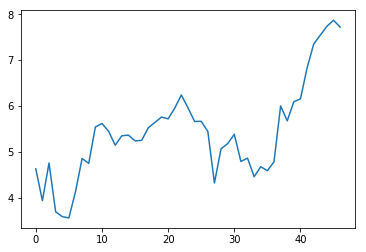

In [56]:
plt.plot(np.log(success_array))

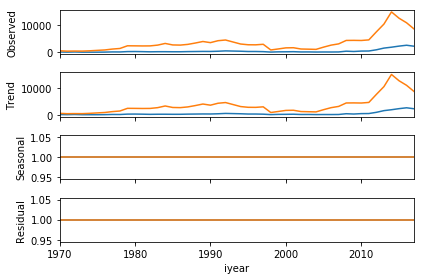

In [48]:
from random import randrange
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_new, model='multiplicative', freq=1)
result.plot()
pyplot.show()

In [49]:
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
X = success_array
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.708839
p-value: 0.072521
Critical Values:
	1%: -3.593
	5%: -2.932
	10%: -2.604


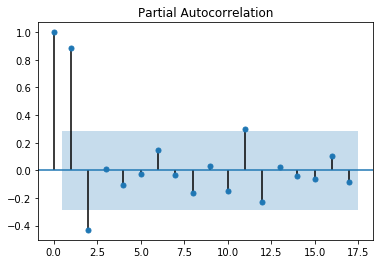

In [50]:

#series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0)
success_array = np.array(success_array)
success = df['success']
plot_pacf(success_array)
pyplot.show()

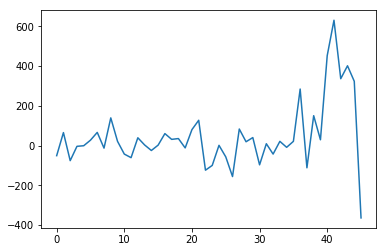

In [62]:
differenced = [success_array[x] - success_array[x-1] for x in range(1,len(success_array))]
plt.plot(differenced)
#plt.plot(moving_avg, color = 'red')

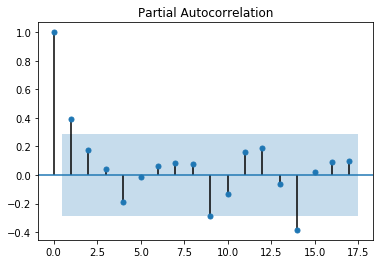

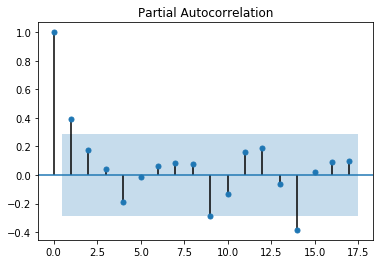

In [66]:
differenced = np.array(differenced)
plot_pacf(differenced)

In [67]:
from statsmodels.tsa.arima_model import ARIMA

In [68]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.66)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit(disp=0)
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	error = mean_squared_error(test, predictions)
	return error

In [ ]:
p_values = [0, 1, 2]
q_values = range(0, 3)

best_score, best_cfg = float("inf"), None
for p in p_values:
    for q in q_values:
        order = (p,1,q)
        try:
            mse = evaluate_arima_model(differenced, order)
            if mse < best_score:
                best_score, best_cfg = mse, order
            print('ARIMA%s MSE=%.3f' % (order,mse))
        except:
            continue
print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/conda/lib/python3.6/site